<b>June 24, 2025 ‚Ä¢ 09:05 AM</b>

In [63]:
#!/usr/bin/env python3
# Panutad Sirikul (French)
# 650510714
# customer_relationship_management
# 229496 Sec DS

# **Thai NLP Categorization Project**

1. Read some admin's remark on problem report
2. Categorize Problem (New Feature) according to keyword in report
3. Manual category checking
4. Presentation slides for CEO

<div class="alert alert-block alert-info">
<b>Note:</b> Use Microsoft Teams for chatting with supervisor for tips and notes</div>

### **Importing Dataset**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [65]:
# To print all columns
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [66]:
# To display the full text in a pandas DataFrame
#pd.set_option("display.max_colwidth", None) # Show full text in each cell

In [67]:
data = pd.read_csv("report_problem_raw.csv")
data

report_problem_id  professional_id              problem_group  \
0                   7714             1753  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô / ‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
1                   7715             5033                     ‡∏≠‡∏∑‡πà‡∏ô ‡πÜ   
2                   7716             2363        ‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢"   
3                   7717             4379  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô / ‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
4                   7718             5126        ‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢"   
...                  ...              ...                        ...   
27588              36346            11979  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô / ‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27589              36347             7992         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27590              36353             1112         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27591              36356            11973         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27592              36367            12699         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   

                            problem_name          report_date  \
0                      ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)  2022-01-01 00:00:00   
1                                 ‡∏≠‡∏∑‡πà‡∏ô ‡πÜ  2022-01-01 00:00:00   
2            ‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢  2022-01-01 00:00:00   
3                      ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)  2022-01-01 00:00:00   
4            ‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢  2022-01-01 00:00:00   
...                                  ...                  ...   
27588  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£‡∏õ‡πâ‡∏≠‡∏ô‡∏á‡∏≤‡∏ô‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô)  2025-05-31 19:16:00   
27589            ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢  2025-05-31 20:57:00   
27590    ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤ 4 ‡∏î‡∏≤‡∏ß  2025-05-31 23:08:00   
27591            ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢  2025-05-31 19:00:00   
27592            ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢  2025-05-31 15:17:00   

                                                  remark  
0      ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô smart world ‡πÅ‡∏à‡πâ‡∏á‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏ö‡∏≤‡∏¢‡∏Ñ‡πà‡∏∞ \...  
1      ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏∏‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏ß‡πà‡∏≤ ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡πÇ‡∏ó‡∏£‡∏´...  
2      ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡∏ß‡πà‡∏≤ ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÄ‡∏õ‡∏¥‡∏î‡∏õ‡∏¥‡∏î‡∏õ‡∏£‡∏∞‡∏ï‡∏π‡∏°‡∏∏‡πâ‡∏á‡∏•‡∏ß‡∏î...  
3      ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏Å‡∏î‡∏´‡∏±‡∏ß‡πÉ‡∏à‡πÉ‡∏´‡πâ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏á‡∏≤‡∏ô‡∏à‡∏∂‡∏á‡πÄ‡∏Ç...  
4      5126 : Punika Jantanop   ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏ß‡πà...  
...                                                  ...  
27588                 ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏Ñ‡πà‡∏∞  
27589  ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡πÄ‡∏Å‡πá‡∏ö‡∏™‡∏¥‡πà‡∏á‡∏Ç‡∏≠‡∏á‡πÉ‡∏´‡πâ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ...  
27590  2 ‡∏î‡∏≤‡∏ß   Complain about the room, not organizin...  
27591     ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏ó‡∏≤‡∏á‡πÅ‡∏ä‡∏ó  
27592  ‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏Ñ‡∏ô‡∏ô‡∏µ‡πâ‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÄ‡∏•‡∏¢‡∏Ñ‡πà‡∏∞ ‡∏ï‡πà‡∏≠‡πÑ‡∏õ‡πÑ‡∏°‡πà‡πÄ‡∏≠‡∏≤‡∏Ñ‡∏ô‡∏ô‡∏µ‡πâ‡∏ô‡∏∞‡∏Ñ...  

[27593 rows x 6 columns]

### <b>Step 1: Text Preprocessing</b>
* Remove punctuation/special characters
* Tokenization (‡∏ï‡∏±‡∏î‡∏Ñ‡∏≥) - Use `pythainlp.tokenize.word_tokenize()`
* Remove stopwords - Use `pythainlp.corpus.common.thai_stopwords`

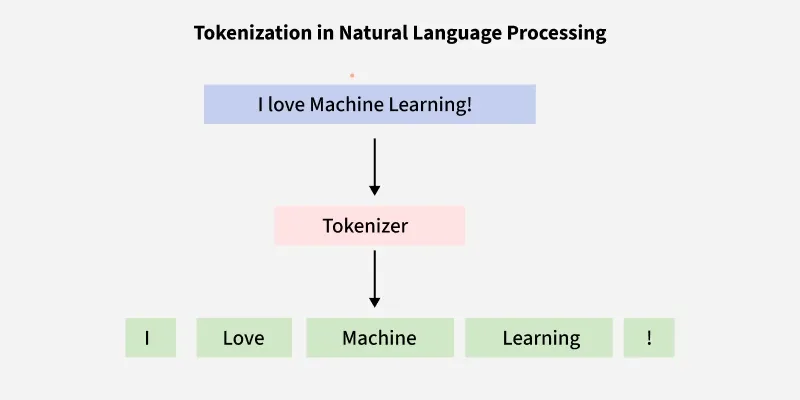

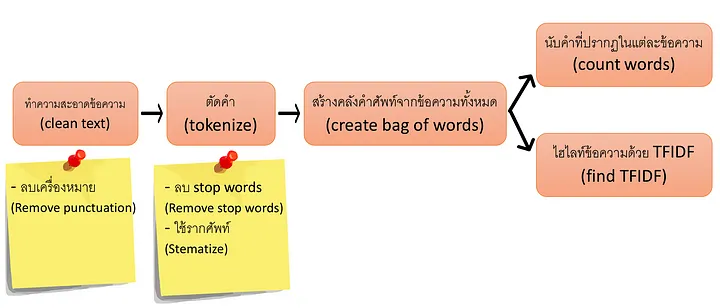

* Word Cleanup
    * ‡∏™‡∏£‡∏∞‡πÄ‡∏≠‡∏™‡∏≠‡∏á‡∏ï‡∏±‡∏ß `‡πÄ‡πÄ-` ‡πÅ‡∏Å‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏£‡∏∞‡πÅ‡∏≠ `‡πÅ-`
    * ‡∏ã‡πâ‡∏≥‡∏ï‡∏±‡∏ß‡∏™‡∏∞‡∏Å‡∏î `‡∏î‡πà‡∏ß‡∏ô‡∏ô‡∏ô‡∏ô‡∏ô` ‚Üí `‡∏î‡πà‡∏ß‡∏ô`

In [68]:
#pip install pythainlp

In [69]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import string
import re

stopwords = set(thai_stopwords()) - {"‡πÑ‡∏°‡πà"}

def clean_text(text):
    text = re.sub("‡πÄ‡πÄ", "‡πÅ", text)                           # üõ†Ô∏è Fix miswritten vowel ‡πÄ‡πÄ ‚Üí ‡πÅ
    text = re.sub(r'(.)\1{2,}', r'\1', text)                # üîÅ Remove character repetition (e.g. ‡∏°‡∏≤‡∏Å‡∏Å‡∏Å‡∏Å ‚Üí ‡∏°‡∏≤‡∏Å)
    text = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z0-9\s]', '', text) # üö´ Remove emojis and non-Thai characters (except spaces and numbers)
    return text

def preprocess(text):
    if not isinstance(text, str):
        text = ""
    text = clean_text(text)
    tokens = word_tokenize(text, keep_whitespace=False)
    tokens = [t for t in tokens if t not in stopwords and t not in string.punctuation]
    return tokens

data["tokens"] = data["remark"].apply(preprocess)


In [70]:
print(data["tokens"])

0        [‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô, ‡∏Ñ‡∏∑‡∏ô, ‡∏á‡∏≤‡∏ô, smart, world, ‡πÅ‡∏à‡πâ‡∏á, ‡πÑ‡∏°‡πà, ‡∏™...
1        [‡∏•‡∏∏‡∏Å, ‡∏Ñ‡πâ‡∏≤, ‡πÅ‡∏à‡πâ‡∏á, ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á, ‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤, ‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô, ‡πÇ‡∏ó‡∏£,...
2        [‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤, ‡πÅ‡∏à‡πâ‡∏á, ‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô, ‡∏õ‡∏¥‡∏î‡∏õ‡∏£‡∏∞‡∏ï‡∏π, ‡∏°‡∏∏‡πâ‡∏á‡∏•‡∏ß‡∏î, ‡πÅ‡∏£‡∏á...
3        [‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô, ‡∏Å‡∏î, ‡∏´‡∏±‡∏ß‡πÉ‡∏à, ‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤, ‡∏á‡∏≤‡∏ô, ‡∏£‡∏∞‡∏ö‡∏ö, ‡∏≠‡∏±‡∏ï‡πÇ‡∏ô‡∏°...
4        [5126, Punika, Jantanop, ‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤, ‡πÅ‡∏à‡πâ‡∏á, ‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤,...
                               ...                        
27588                     [‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô, ‡πÑ‡∏°‡πà, ‡∏™‡∏∞‡∏î‡∏ß‡∏Å, ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£]
27589    [‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô, ‡πÑ‡∏°‡πà, ‡∏à‡∏±‡∏î‡πÄ‡∏Å‡πá‡∏ö, ‡∏™‡∏¥‡πà‡∏á‡∏Ç‡∏≠‡∏á, ‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤, ‡πÑ‡∏°‡πà, ...
27590    [2, ‡∏î‡∏≤‡∏ß, Complain, about, the, room, not, orga...
27591    [‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤, ‡πÅ‡∏à‡πâ‡∏á, ‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û, ‡∏û‡∏∑‡πâ‡∏

### <b>Step 2: Define Keywords for Each Category</b>
* Create a dictionary with `{"category_name": ["keyword1", "keyword2", ...]}`

In [71]:
# Take a look at each problem group input by service provider
data["problem_name"].unique()

array(['‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)', '‡∏≠‡∏∑‡πà‡∏ô ‡πÜ', '‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢',
       '‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢', '‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤ 4 ‡∏î‡∏≤‡∏ß',
       '‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏•‡πà‡∏ß‡∏á‡∏´‡∏ô‡πâ‡∏≤)', '‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏Ç‡∏≠‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡∏∑‡∏ô', '‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏™‡∏≤‡∏¢',
       'Checkout ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤ / ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö‡∏ä‡∏±‡πà‡∏ß‡πÇ‡∏°‡∏á‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á',
       '‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå/‡∏ô‡πâ‡∏≥‡∏¢‡∏≤‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î', '‡∏Ç‡∏≠‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£', nan,
       '‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î)', '‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡∏ô‡∏≠‡∏Å / ‡∏£‡∏±‡∏ö‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î',
       '‡πÑ‡∏°‡πà‡πÇ‡∏ó‡∏£ confirm ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏£‡∏±‡∏ö‡∏á

* Use <b>the words from df["tokens"] to help you build the keyword list</b>, but you need to manually decide which words represent which category.
* Use <b>Text Filters in Excel</b> to find keywords from each problem (Optional)

In [72]:
from collections import Counter

# Filter the DataFrame
tokens_series = data[data["problem_name"] == '‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)']["tokens"]

# Flatten the list of tokens
all_tokens = [token for tokens in tokens_series for token in tokens]

# Count most common words
word_counts = Counter(all_tokens)
print(word_counts.most_common())

[('‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô', 12938), ('\n', 12158), ('‡πÑ‡∏°‡πà', 9503), ('‡∏á‡∏≤‡∏ô', 9098), ('‡πÅ‡∏à‡πâ‡∏á', 9014), ('‡∏Ñ‡∏∑‡∏ô', 6405), ('‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤', 4597), ('‡∏™‡∏∞‡∏î‡∏ß‡∏Å', 3073), ('‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£', 2316), ('‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô', 2076), ('‡∏à‡∏≠‡∏á', 1722), ('‡∏Å‡∏î', 1622), ('‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠', 1436), ('‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô', 1287), ('‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô', 1252), ('‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà', 1209), ('‡πÄ‡∏ß‡∏•‡∏≤', 1185), ('‡πÅ‡∏≠‡∏î‡∏°‡∏¥‡∏ô', 1135), ('‡∏ô', 1016), ('‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢', 919), ('‡∏£‡∏´‡∏±‡∏™', 916), ('‡∏ó‡πà‡∏≤‡∏ô', 914), ('Wean', 893), ('‡πÇ‡∏ó‡∏£', 869), ('‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤', 854), ('‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á', 854), ('‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î', 809), ('‡∏û‡∏¥‡∏à‡∏≤‡∏£‡∏ì‡∏≤', 784), ('‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏', 697), ('2', 678), ('‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô‡∏á‡∏≤‡∏ô', 674), ('‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô', 668), ('‡∏ï‡∏¥‡∏î‡∏ï‡∏≤‡∏°', 666), ('‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û', 663), ('‡∏£‡∏ñ', 661), ('2024', 652), ('‡∏≠‡∏ô‡∏∏‡πÇ‡∏•‡∏°', 650), ('‡∏ô‡∏∞‡∏Ñ‡∏∞', 634), ('‡∏î‡

In [73]:
# First Keywords Idea
'''keyword_dict = {
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)": ["‡∏Ñ‡∏∑‡∏ô", "‡∏á‡∏≤‡∏ô", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏Å‡∏î", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ"],
    #"‡∏≠‡∏∑‡πà‡∏ô ‡πÜ": ["‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏", "‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î", "‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô", "‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á", "‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°", "‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô‡∏á‡∏≤‡∏ô", "‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£"],
    "‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢": ["‡∏ó‡∏≥", "‡πÅ‡∏ï‡∏Å", "‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô", "‡πÄ‡∏Ñ‡∏•‡∏°", "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢",
                               "‡∏´‡∏±‡∏Å", "‡∏Å‡∏£‡∏∞‡∏à‡∏Å", "‡∏´‡∏•‡∏∏‡∏î", "‡∏£‡∏≠‡∏¢", "‡πÅ‡∏Å‡πâ‡∏ß", "‡∏ï‡∏Å",
                               "‡∏´‡∏•‡πà‡∏ô", "‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢", "‡∏û‡∏±‡∏á", "‡∏Ç‡∏ß‡∏î"],
    "‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢": ["‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢", "‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡∏ù‡∏∏‡πà‡∏ô", "‡πÄ‡∏ä‡πá‡∏î",
                             "‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û", "‡∏Ñ‡∏£‡∏≤‡∏ö", "‡∏¢‡∏±‡∏á‡∏°‡∏µ", "‡∏à‡∏∏‡∏î", "‡∏•‡πâ‡∏≤‡∏á", "‡∏ñ‡∏π"],
    "‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤ 4 ‡∏î‡∏≤‡∏ß": ["‡∏î‡∏≤‡∏ß", "‡∏£‡∏µ‡∏ß‡∏¥‡∏ß", "3", "2", "Comment",
                                   "1", "‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á", "‡∏î‡∏µ"],
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏•‡πà‡∏ß‡∏á‡∏´‡∏ô‡πâ‡∏≤)": ["‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô", "‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢", "2024", "2023", "2025", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô"
                       "‡∏®‡∏∏‡∏Å‡∏£‡πå", "‡πÄ‡∏™‡∏≤‡∏£‡πå", "‡∏à‡∏±‡∏ô‡∏ó‡∏£‡πå", "‡∏ò.‡∏Ñ.", "(13:00)", "‡∏û.‡∏Ñ.",
                       "‡πÄ‡∏°.‡∏¢.", "‡∏™.‡∏Ñ.", "‡∏≠‡∏±‡∏á‡∏Ñ‡∏≤‡∏£", "‡∏Å.‡∏û.", "‡∏ï.‡∏Ñ.", "‡∏°.‡∏Ñ.",
                       "(08:00)", "‡∏°‡∏¥.‡∏¢.", "(11:00)"],
    "‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏Ç‡∏≠‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡∏∑‡∏ô": ["‡πÄ‡∏á‡∏¥‡∏ô"],
    "‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏™‡∏≤‡∏¢": ["‡∏™‡∏≤‡∏¢", "‡∏£‡∏≠"],
    "Checkout ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤ / ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö‡∏ä‡∏±‡πà‡∏ß‡πÇ‡∏°‡∏á‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á": ["‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å"],
    "‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå/‡∏ô‡πâ‡∏≥‡∏¢‡∏≤‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î": ["‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå", "‡∏ô‡πâ‡∏≥‡∏¢‡∏≤", "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏î‡∏π‡∏î‡∏ù‡∏∏‡πà‡∏ô"],
    "‡∏Ç‡∏≠‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": ["‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢", "‡πÄ‡∏î‡∏¥‡∏°"],
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î)": ["‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î", "‡∏ï‡∏¥‡∏î", "‡∏Å‡∏±‡∏Å‡∏ï‡∏±‡∏ß", "‡πâ‡πÄ‡∏™‡∏µ‡πà‡∏¢‡∏á", "‡∏Å‡∏±‡∏Å", "‡πÇ‡∏Ñ", "‡πÄ‡∏ä‡∏∑‡πâ‡∏≠", "‡πÄ‡∏à‡πá‡∏ö", "‡∏Ñ‡∏≠"],
    "‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡∏ô‡∏≠‡∏Å / ‡∏£‡∏±‡∏ö‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î": ["‡∏ä‡∏±‡πà‡∏ß‡πÇ‡∏°‡∏á", "‡∏ö‡∏≤‡∏ó", "‡πÄ‡∏ß‡∏•‡∏≤", "‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°", 
                                 "behavior", "cash", "charging"],
    "‡πÑ‡∏°‡πà‡πÇ‡∏ó‡∏£ confirm ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô ‡∏´‡∏£‡∏∑‡∏≠ ‡∏Å‡πà‡∏≠‡∏ô‡∏ß‡∏±‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": ["‡πÇ‡∏ó‡∏£", "‡∏Ñ‡∏≠‡∏ô‡πÄ‡∏ü‡∏¥‡∏£‡πå‡∏°"],
    '‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô "‡∏™‡∏π‡∏ç‡∏´‡∏≤‡∏¢" ‡∏´‡∏•‡∏±‡∏á‡πÉ‡∏ä‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£': ["‡∏´‡∏≤‡∏¢", "‡∏ß‡∏≤‡∏á", "‡πÄ‡∏à‡∏≠", "‡∏´‡∏≤", "‡∏™‡∏π‡∏ç‡∏´‡∏≤‡∏¢",
                                   "‡∏Ç‡πÇ‡∏°‡∏¢", "‡∏ó‡∏¥‡πâ‡∏á", "‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô", "‡∏´‡∏≤‡πÑ‡∏°‡πà", "missing", "lost"],
    "‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡πÑ‡∏°‡πà‡πÑ‡∏õ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£ / ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤ (No Show)": ["‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡∏£‡∏±‡∏ö‡∏™‡∏≤‡∏¢", "‡πÄ‡∏Ç‡πâ‡∏≤‡∏á‡∏≤‡∏ô", "‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô"],
    "‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û / ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏û‡∏∂‡∏á‡∏û‡∏≠‡πÉ‡∏à": ["‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢", "‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢", "‡∏õ‡∏±‡∏ç‡∏´‡∏≤", "‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å", "‡∏û‡∏≠‡πÉ‡∏à"],
    "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö": ["ironing", "‡∏£‡∏µ‡∏î", "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤", "‡πÄ‡∏™‡∏∑‡πâ‡∏≠‡∏ú‡πâ‡∏≤", "‡πÄ‡∏™‡∏∑‡πâ‡∏≠", "‡∏ú‡πâ‡∏≤"],
    "‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏¥‡∏¢‡∏≤ ‡∏ó‡πà‡∏≤‡∏ó‡∏≤‡∏á ‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°‡∏Ç‡∏ì‡∏∞‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": ["‡∏°‡∏≤‡∏£‡∏¢‡∏≤‡∏ó", "‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°", "‡∏õ‡∏±‡∏ç‡∏´‡∏≤", "‡πÄ‡∏ñ‡∏µ‡∏¢‡∏á", "‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å", 
                                              "‡∏û‡∏π‡∏î‡∏à‡∏≤", "‡∏ü‡∏±‡∏á", "‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡∏ö‡πà‡∏ô", "‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤"],
    "‡∏Å‡∏≤‡∏£‡∏™‡∏∑‡πà‡∏≠‡∏™‡∏≤‡∏£ / ‡πÉ‡∏ä‡πâ‡∏ñ‡πâ‡∏≠‡∏¢‡∏Ñ‡∏≥‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏†‡∏≤‡∏û / ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤": ["‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß", "‡∏ö‡πà‡∏ô", "‡∏ß‡∏≤‡∏á‡∏™‡∏≤‡∏¢", "‡πÇ‡∏ó‡∏£", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡∏°‡∏≤‡∏£‡∏¢‡∏≤‡∏ó",
                                                          "‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å", "‡∏Ñ‡∏∏‡∏¢", "‡∏û‡∏≠‡πÉ‡∏à", "‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°", "‡∏£‡∏ö‡∏Å‡∏ß‡∏ô"],
    "‡∏ó‡∏¥‡πâ‡∏á‡∏Ç‡∏≠‡∏á‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏ñ‡∏≤‡∏°‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤": ["‡∏Ç‡∏¢‡∏∞", "‡∏ñ‡∏∏‡∏á", "‡∏´‡∏≤‡∏¢", "‡∏ö‡∏≤‡∏á‡∏≠‡∏¢‡πà‡∏≤‡∏á", "‡πÄ‡∏à‡∏≠", 
                             "‡∏ß‡∏≤‡∏á", "‡∏ñ‡∏±‡∏á‡∏Ç‡∏¢‡∏∞", "‡∏•‡∏∑‡∏°", "‡πÄ‡∏ú‡∏•‡∏≠", "‡∏™‡∏π‡∏ç‡∏´‡∏≤‡∏¢"],
    "Checkin ‡∏Å‡πà‡∏≠‡∏ô‡∏ñ‡∏∂‡∏á‡∏™‡∏ñ‡∏≤‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢": ["‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤", "‡∏£‡∏≠", "‡∏´‡∏ô‡πâ‡∏≤", "‡πÄ‡∏ä‡πá‡∏Ñ", "‡∏≠‡∏¥‡∏ô", "‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡∏°‡∏≤‡∏ñ‡∏∂‡∏á"],
    "‡πÑ‡∏°‡πà‡πÅ‡∏™‡∏î‡∏á‡∏ï‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ú‡∏π‡πâ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÉ‡∏ô‡∏£‡∏∞‡∏ö‡∏ö‡∏ö‡∏µ‡∏ô‡∏µ‡∏ó": ["‡∏£‡∏∞‡∏ö‡∏ö", "ID", "‡∏£‡∏´‡∏±‡∏™", "‡∏ä‡∏∑‡πà‡∏≠", "‡πÅ‡∏ä‡∏ó", "‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•"],
    "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ä‡∏¥‡πâ‡∏ô": ["‡∏£‡∏µ‡∏î", "‡∏ä‡∏¥‡πâ‡∏ô", "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤", "‡∏ï‡∏±‡∏ß", "‡∏ú‡πâ‡∏≤", "‡∏à‡∏≥‡∏ô‡∏ß‡∏ô"],
    "‡πÉ‡∏ä‡πâ‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏Ç‡∏ì‡∏∞‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": ["‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå", "‡πÄ‡∏•‡πà‡∏ô", "‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡∏Ñ‡∏∏‡∏¢", "‡∏ó‡∏≥", "‡∏ï‡∏≠‡∏ô", "‡πÄ‡∏Å‡∏°‡∏™‡πå", "‡∏î‡∏π"],
    "‡πÄ‡∏õ‡∏¥‡∏î/‡∏õ‡∏¥‡∏î ‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÉ‡∏ä‡πâ‡πÑ‡∏ü‡∏ü‡πâ‡∏≤‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï": ["‡πÅ‡∏≠‡∏£‡πå", "‡∏•‡∏∑‡∏°", "‡πÑ‡∏ü", "‡∏õ‡∏¥‡∏î‡πÑ‡∏ü", "‡∏õ‡∏•‡∏±‡πä‡∏Å", "‡πÄ‡∏™‡∏µ‡∏¢‡∏ö",
                                                    "‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï", "‡∏™‡∏±‡∏ö", "‡∏Ñ‡∏±‡∏ï", "‡πÄ‡∏≠‡∏≤‡∏ó‡πå", "‡∏Ñ‡πâ‡∏≤‡∏á"],
    "‡πÅ‡∏ï‡πà‡∏á‡∏Å‡∏≤‡∏¢‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢ / ‡πÑ‡∏°‡πà‡∏ñ‡∏π‡∏Å‡∏Å‡∏≤‡∏•‡∏∞‡πÄ‡∏ó‡∏®‡∏∞": ["‡∏ä‡∏∏‡∏î", "‡∏î‡∏π‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ", "‡πÅ‡∏ï‡πà‡∏á‡∏Å‡∏≤‡∏¢", "‡∏™‡∏∏‡∏†‡∏≤‡∏û", "‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°",
                                       "‡∏†‡∏≤‡∏û‡∏•‡∏±‡∏Å‡∏©‡∏ì‡πå", "‡∏Å‡∏≤‡∏á‡πÄ‡∏Å‡∏á‡∏Ç‡∏≤‡∏™‡∏±‡πâ‡∏ô"],
    "‡∏û‡∏≤‡∏ö‡∏∏‡∏Ñ‡∏Ñ‡∏•‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å (‡∏ô‡∏≠‡∏Å‡πÄ‡∏´‡∏ô‡∏∑‡∏≠‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á) ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": ["‡∏Ñ‡∏ô", "‡πÅ‡∏ü‡∏ô", "‡∏•‡∏π‡∏Å", "‡πÅ‡∏°‡∏ß", "‡∏•‡∏π‡∏Å‡∏™‡∏≤‡∏ß", 
                                                        "‡∏Ñ‡∏ô‡πÅ‡∏õ‡∏•‡∏Å‡∏´‡∏ô‡πâ‡∏≤", "‡∏Ñ‡∏ô‡∏ô‡∏≠‡∏Å", "‡∏Ñ‡∏ô‡∏≠‡∏∑‡πà‡∏ô", "‡πÄ‡∏î‡πá‡∏Å"],
    "‡πÅ‡∏≠‡∏£‡πå‡πÑ‡∏°‡πà‡πÄ‡∏¢‡πá‡∏ô ": ["‡πÅ‡∏≠‡∏£‡πå", "‡πÄ‡∏¢‡πá‡∏ô", "‡∏õ‡∏±‡∏ç‡∏´‡∏≤", "‡∏ä‡πà‡∏≤‡∏á", "‡∏•‡∏°", "‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏Å‡∏ï‡∏¥", "‡πÄ‡∏ä‡πá‡∏Ñ", "‡∏•‡πâ‡∏≤‡∏á"],
    "‡πÅ‡∏≠‡∏£‡πå‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏´‡∏¢‡∏î": ["‡πÅ‡∏≠‡∏£‡πå", "‡∏ô‡πâ‡∏≥", "‡∏´‡∏¢‡∏î", "‡∏ä‡πà‡∏≤‡∏á", "‡∏•‡πâ‡∏≤‡∏á", "‡πÑ‡∏´‡∏•", "‡∏£‡∏±‡πà‡∏ß", "‡∏ú‡∏ô‡∏±‡∏á", "‡∏•‡∏á‡∏°‡∏≤"],
    "‡πÅ‡∏≠‡∏£‡πå‡∏°‡∏µ‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏î‡∏±‡∏á ": ["‡πÅ‡∏≠‡∏£‡πå", "‡πÄ‡∏™‡∏µ‡∏¢‡∏á", "‡∏°‡∏µ‡πÄ‡∏™‡∏µ‡∏¢‡∏á", "‡∏£‡∏ö‡∏Å‡∏ß‡∏ô", "‡∏û‡∏±‡∏Å‡∏•‡∏°"],
    '‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà "‡∏•‡πâ‡∏≤‡∏á‡πÅ‡∏≠‡∏£‡πå" ‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢': ["‡πÅ‡∏≠‡∏£‡πå", "‡∏ô‡πâ‡∏≥", "‡∏û‡∏∑‡πâ‡∏ô", "‡πÄ‡∏õ‡∏µ‡∏¢‡∏Å", "‡∏™‡∏∞‡∏≠‡∏≤‡∏î",
                                      "‡πÄ‡∏•‡∏≠‡∏∞", "‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡∏Å‡∏£‡∏∞‡πÄ‡∏î‡πá‡∏ô"],
    "‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏™‡∏µ‡∏¢ ‡∏´‡∏•‡∏±‡∏á‡∏Å‡∏≤‡∏£‡∏•‡πâ‡∏≤‡∏á": ["‡πÅ‡∏≠‡∏£‡πå", "‡∏™‡∏ß‡∏¥‡∏á", "‡∏ï‡∏¥‡∏î", "‡πÄ‡∏ö‡∏≠‡∏£‡πå", "‡∏´‡∏¢‡∏∏‡∏î"],
    "‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏î‡πâ‡∏Ñ‡∏£‡∏ö‡∏ï‡∏≤‡∏°‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á [‡πÄ‡∏Å‡∏¥‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏à‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤]": ["‡πÅ‡∏≠‡∏£‡πå", "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á", "‡πÅ‡∏Å‡∏∞", "‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤",
                                                          "‡πÅ‡∏Ç‡∏ß‡∏ô", "‡πÅ‡∏ú‡πà‡∏ô‡∏î‡∏¥‡∏ô‡πÑ‡∏´‡∏ß", "‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á", 
                                                          "‡∏û‡∏ö‡πÄ‡∏´‡πá‡∏ô", "‡∏Å‡∏•‡∏¥‡πà‡∏ô", "‡∏â‡∏µ‡∏î"],
    "‡∏ú‡∏π‡πâ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏õ‡∏ñ‡∏∂‡∏á‡πÅ‡∏•‡πâ‡∏ß ‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏î‡πâ [‡πÄ‡∏Å‡∏¥‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏à‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤]": ["‡∏´‡∏ô‡πâ‡∏≤", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏ó‡∏≥", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡∏ß‡πà‡∏≤‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ"],
    "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏´‡∏°‡πâ / ‡∏ú‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢": ["‡πÑ‡∏´‡∏°‡πâ", "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤", "‡∏£‡∏µ‡∏î", "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢", "‡∏ú‡πâ‡∏≤", "‡∏¢‡πà‡∏ô", "‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏ú‡πâ‡∏≤", "‡πÑ‡∏ü"],
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£‡∏õ‡πâ‡∏≠‡∏ô‡∏á‡∏≤‡∏ô‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô)": ["‡∏Ñ‡∏∑‡∏ô", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏á‡∏≤‡∏ô", "‡∏Å‡∏≤‡∏£‡∏Ñ‡∏∑‡∏ô", "‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£"],
    "‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î ": ["‡πÅ‡∏≠‡∏£‡πå", "‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡∏õ‡∏Å‡∏ï‡∏¥", "‡∏ä‡πà‡∏≤‡∏á", "‡∏ã‡πà‡∏≠‡∏°"]
}'''

'keyword_dict = {\n    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)": ["‡∏Ñ‡∏∑‡∏ô", "‡∏á‡∏≤‡∏ô", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏Å‡∏î", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ"],\n    #"‡∏≠‡∏∑‡πà‡∏ô ‡πÜ": ["‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏", "‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î", "‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô", "‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á", "‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°", "‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô‡∏á‡∏≤‡∏ô", "‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£"],\n    "‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢": ["‡∏ó‡∏≥", "‡πÅ‡∏ï‡∏Å", "‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô", "‡πÄ‡∏Ñ‡∏•‡∏°", "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢",\n                               "‡∏´‡∏±‡∏Å", "‡∏Å‡∏£‡∏∞‡∏à‡∏Å", "‡∏´‡∏•‡∏∏‡∏î", "‡∏£‡∏≠‡∏¢", "‡πÅ‡∏Å‡πâ‡∏ß", "‡∏ï‡∏Å",\n                               "‡∏´‡∏•‡πà‡∏ô", "‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢", "‡∏û‡∏±‡∏á", "‡∏Ç‡∏ß‡∏î"],\n    "‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢": ["‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢", "‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡∏ù‡∏∏‡πà‡∏ô", "‡πÄ‡∏ä‡πá‡∏î",\n        

In [74]:
# Refined Keywords
keyword_dict = {
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)": [
        "‡∏Ñ‡∏∑‡∏ô", "‡πÅ‡∏à‡πâ‡∏á", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏Å‡∏î", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ", "‡∏ï‡∏¥‡∏î‡∏ò‡∏∏‡∏£‡∏∞", 
        "‡∏Ç‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ", "‡∏Ç‡∏≠‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÑ‡∏°‡πà‡∏ß‡πà‡∏≤‡∏á", "‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô", "‡∏õ‡πà‡∏ß‡∏¢", "‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô", 
        "‡πÑ‡∏°‡πà‡πÑ‡∏õ", "‡∏ï‡∏¥‡∏î", "‡∏ï‡∏¥‡∏î‡∏†‡∏≤‡∏£‡∏Å‡∏¥‡∏à", "‡πÑ‡∏°‡πà‡∏û‡∏£‡πâ‡∏≠‡∏°", "‡∏°‡∏µ‡∏ò‡∏∏‡∏£‡∏∞", "‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡∏ï‡∏¥‡∏î‡∏á‡∏≤‡∏ô",
        "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏°‡πà‡∏ß‡πà‡∏≤‡∏á", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ", "‡∏†‡∏≤‡∏£‡∏Å‡∏¥‡∏à"
    ],
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏•‡πà‡∏ß‡∏á‡∏´‡∏ô‡πâ‡∏≤)": [
        "‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô", "‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÅ‡∏à‡πâ‡∏á‡∏•‡πà‡∏ß‡∏á‡∏´‡∏ô‡πâ‡∏≤", "‡∏Ç‡∏≠‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å",
        "‡∏Ç‡∏≠‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô", "‡πÑ‡∏°‡πà‡∏ß‡πà‡∏≤‡∏á", "‡∏Ç‡∏≠‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ", "‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", 
        "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏ô‡∏±‡∏î", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ß‡∏±‡∏ô", "‡∏ô‡∏±‡∏î‡πÉ‡∏´‡∏°‡πà", "‡∏ß‡∏±‡∏ô‡∏≠‡∏∑‡πà‡∏ô", "‡∏Ç‡∏≠‡πÅ‡∏à‡πâ‡∏á", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ô‡∏±‡∏î",
        # Optional: date/time tokens (low weight, but may help)
        "‡∏®‡∏∏‡∏Å‡∏£‡πå", "‡πÄ‡∏™‡∏≤‡∏£‡πå", "‡∏à‡∏±‡∏ô‡∏ó‡∏£‡πå", "‡∏≠‡∏±‡∏á‡∏Ñ‡∏≤‡∏£", "‡∏û‡∏∏‡∏ò", "‡∏û‡∏§‡∏´‡∏±‡∏™", "‡∏≠‡∏≤‡∏ó‡∏¥‡∏ï‡∏¢‡πå",
        "‡∏°.‡∏Ñ.", "‡∏Å.‡∏û.", "‡∏°‡∏µ.‡∏Ñ.", "‡πÄ‡∏°.‡∏¢.", "‡∏û.‡∏Ñ.", "‡∏°‡∏¥.‡∏¢.", "‡∏Å.‡∏Ñ.", "‡∏™.‡∏Ñ.", "‡∏Å.‡∏¢.", "‡∏ï.‡∏Ñ.", "‡∏û.‡∏¢.", "‡∏ò.‡∏Ñ.",
        "2023", "2024", "2025",
        "(08:00)", "(11:00)", "(13:00)"
    ],
    "‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤ 4 ‡∏î‡∏≤‡∏ß": [
        "‡∏î‡∏≤‡∏ß", "‡∏£‡∏µ‡∏ß‡∏¥‡∏ß", "1", "2", "3", "1‡∏î‡∏≤‡∏ß", "2‡∏î‡∏≤‡∏ß", "3‡∏î‡∏≤‡∏ß",
        "‡πÑ‡∏°‡πà‡∏õ‡∏£‡∏∞‡∏ó‡∏±‡∏ö‡πÉ‡∏à", "‡πÑ‡∏°‡πà‡πÇ‡∏≠‡πÄ‡∏Ñ", "‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏à", "‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡∏ï‡πâ‡∏≠‡∏á‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á", "‡∏Ñ‡∏ß‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á",
        "‡∏Ç‡∏≠‡∏ï‡∏¥", "‡∏Ç‡πâ‡∏≠‡∏ï‡∏¥", "‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡πÄ‡∏™‡∏µ‡∏¢", "‡∏û‡∏±‡∏í‡∏ô‡∏≤‡∏î‡πà‡∏ß‡∏ô", "‡∏Ñ‡∏ß‡∏£‡∏û‡∏±‡∏í‡∏ô‡∏≤", "‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô", 
        "‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡∏î‡∏µ", "comment", "feedback", "‡πÅ‡∏¢‡πà", "‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢",
        "‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡∏û‡∏•‡∏≤‡∏î", "‡∏•‡∏∑‡∏°", "‡∏ï‡∏Å‡∏´‡∏•‡πà‡∏ô", "‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡πÑ‡∏°‡πà‡∏î‡∏µ"
    ],
    "‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢": [
        "‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢", "‡∏ù‡∏∏‡πà‡∏ô", "‡∏Ñ‡∏£‡∏≤‡∏ö", "‡∏•‡πâ‡∏≤‡∏á‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î",
        "‡πÄ‡∏ä‡πá‡∏î", "‡∏à‡∏∏‡∏î", "‡∏¢‡∏±‡∏á‡∏°‡∏µ", "‡πÄ‡∏´‡∏•‡∏∑‡∏≠", "‡∏û‡∏•‡∏≤‡∏î", "‡πÄ‡∏•‡∏≠‡∏∞", "‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡∏ñ‡∏π", "‡∏•‡πâ‡∏≤‡∏á", "‡πÑ‡∏°‡πà‡πÄ‡∏Å‡πá‡∏ö",
        "‡∏û‡∏∑‡πâ‡∏ô‡∏™‡∏Å‡∏õ‡∏£‡∏Å", "‡∏ú‡∏ô‡∏±‡∏á", "‡∏Ñ‡∏£‡∏≤‡∏ö‡∏ô‡πâ‡∏≥", "‡∏û‡∏∑‡πâ‡∏ô‡πÄ‡∏õ‡∏µ‡∏¢‡∏Å", "‡∏•‡∏∑‡∏°‡πÄ‡∏ä‡πá‡∏î", "‡∏•‡∏∑‡∏°‡πÄ‡∏Å‡πá‡∏ö", "‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡πÅ‡∏¢‡πà",
        "‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏ã‡πâ‡∏≥", "‡∏û‡∏∑‡πâ‡∏ô‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡πÄ‡∏Å‡πá‡∏ö‡∏á‡∏≤‡∏ô‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏°‡πà‡∏´‡∏°‡∏î"
    ],
    "‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢": [
        "‡∏ó‡∏≥‡πÄ‡∏™‡∏µ‡∏¢", "‡∏ó‡∏≥‡∏ï‡∏Å", "‡∏ó‡∏≥‡πÅ‡∏ï‡∏Å", "‡∏ó‡∏≥‡∏û‡∏±‡∏á", "‡∏ó‡∏≥‡∏´‡∏•‡πà‡∏ô", "‡∏ó‡∏≥‡∏£‡πà‡∏ß‡∏á", "‡∏£‡πà‡∏ß‡∏á", "‡πÅ‡∏ï‡∏Å", "‡∏û‡∏±‡∏á", "‡∏£‡πâ‡∏≤‡∏ß", "‡∏£‡∏≠‡∏¢", 
        "‡∏ö‡∏∏‡∏ö", "‡∏´‡∏•‡πà‡∏ô", "‡∏£‡πà‡∏ß‡∏á", "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢", "‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢", "‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô", "‡∏Ç‡πâ‡∏≤‡∏ß‡∏Ç‡∏≠‡∏á", "‡∏Ç‡∏≠‡∏á‡πÉ‡∏ä‡πâ", 
        "‡∏Ç‡∏ß‡∏î", "‡πÅ‡∏Å‡πâ‡∏ß", "‡∏Å‡∏£‡∏∞‡∏à‡∏Å", "‡πÇ‡∏ï‡πä‡∏∞", "‡πÄ‡∏Å‡πâ‡∏≤‡∏≠‡∏µ‡πâ", "‡∏û‡∏∑‡πâ‡∏ô", "‡∏õ‡∏£‡∏∞‡∏ï‡∏π", "‡∏ù‡∏≤", "‡∏´‡∏•‡∏≠‡∏î", 
        "‡∏´‡∏±‡∏Å", "‡∏´‡∏•‡∏∏‡∏î", "‡πÄ‡∏Ñ‡∏•‡∏°", "‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô", "‡∏Ç‡∏≠‡πÄ‡∏Ñ‡∏•‡∏°", "‡∏ä‡∏î‡πÉ‡∏ä‡πâ", "‡πÄ‡∏™‡∏µ‡∏¢", "‡∏Ç‡∏π‡∏î", "‡∏Ñ‡∏£‡∏π‡∏î"
    ],
    "‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏Ç‡∏≠‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡∏∑‡∏ô": [
        "‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡∏∑‡∏ô", "‡∏Ç‡∏≠‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡∏∑‡∏ô", "‡∏Ñ‡∏∑‡∏ô‡πÄ‡∏á‡∏¥‡∏ô", "‡∏Ç‡∏≠‡∏Ñ‡∏∑‡∏ô‡πÄ‡∏á‡∏¥‡∏ô", "‡πÄ‡∏á‡∏¥‡∏ô", "‡∏Ñ‡∏∑‡∏ô", "‡∏Ñ‡∏∑‡∏ô‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î",
        "‡∏Ç‡∏≠‡∏Ñ‡∏∑‡∏ô", "‡∏Ñ‡∏∑‡∏ô‡∏¢‡∏≠‡∏î", "‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤‡∏à‡∏≠‡∏á", "‡∏Ç‡∏≠‡πÄ‡∏á‡∏¥‡∏ô", "‡∏Ñ‡∏∑‡∏ô‡∏¢‡∏≠‡∏î‡πÄ‡∏á‡∏¥‡∏ô",
        "‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡∏∑‡∏ô‡πÉ‡∏´‡πâ", "‡∏Ñ‡∏∑‡∏ô‡πÄ‡∏á‡∏¥‡∏ô‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤", "‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î", "‡∏Ç‡∏≠‡∏Ñ‡∏∑‡∏ô‡∏¢‡∏≠‡∏î", "‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤‡∏°‡∏±‡∏î‡∏à‡∏≥"
    ],
    
    
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î)": [
        "‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î", "‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î19", "covid", "covid19", "‡∏ï‡∏¥‡∏î‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î", "‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠", "‡∏ï‡∏¥‡∏î‡πÑ‡∏ß‡∏£‡∏±‡∏™",
        "‡∏Å‡∏±‡∏Å‡∏ï‡∏±‡∏ß", "‡∏Å‡∏±‡∏Å‡∏ö‡∏£‡∏¥‡πÄ‡∏ß‡∏ì", "‡πÄ‡∏™‡∏µ‡πà‡∏¢‡∏á‡∏™‡∏π‡∏á", "‡πÄ‡∏™‡∏µ‡πà‡∏¢‡∏á", "‡πÄ‡∏à‡πá‡∏ö‡∏Ñ‡∏≠", "‡πÑ‡∏Ç‡πâ‡∏≠‡πà‡∏≠‡∏ô", "‡πÑ‡∏°‡πà‡∏™‡∏ö‡∏≤‡∏¢",
        "‡πÑ‡∏Ç‡πâ", "‡πÑ‡∏≠", "‡πÄ‡∏´‡∏ô‡∏∑‡πà‡∏≠‡∏¢", "‡πÑ‡∏°‡πà‡∏™‡∏ö‡∏≤‡∏¢", "‡∏õ‡πà‡∏ß‡∏¢", "‡∏ï‡∏£‡∏ß‡∏à‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î", "‡∏ú‡∏•‡∏ï‡∏£‡∏ß‡∏à", "‡∏ï‡∏£‡∏ß‡∏à‡πÄ‡∏ä‡∏∑‡πâ‡∏≠",
        "‡∏Å‡∏±‡∏Å‡∏ï‡∏±‡∏ß14‡∏ß‡∏±‡∏ô", "‡∏Å‡∏±‡∏Å‡∏ï‡∏±‡∏ß 14 ‡∏ß‡∏±‡∏ô", "‡πÅ‡∏¢‡∏Å‡∏ï‡∏±‡∏ß", "‡∏•‡πâ‡∏°‡∏õ‡πà‡∏ß‡∏¢", "‡∏û‡∏±‡∏Å‡∏£‡∏±‡∏Å‡∏©‡∏≤"
    ],
    "Checkout ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤ / ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö‡∏ä‡∏±‡πà‡∏ß‡πÇ‡∏°‡∏á‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á": [
        "‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡∏≠‡∏≠‡∏Å‡∏Å‡πà‡∏≠‡∏ô", "‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å", "‡∏≠‡∏≠‡∏Å‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡∏Å‡πà‡∏≠‡∏ô‡∏Å‡∏≥‡∏´‡∏ô‡∏î", "‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö‡∏ä‡∏±‡πà‡∏ß‡πÇ‡∏°‡∏á",
        "‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡πÄ‡∏•‡∏¥‡∏Å‡∏á‡∏≤‡∏ô‡∏Å‡πà‡∏≠‡∏ô", "‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡πà‡∏≠‡∏ô", "‡∏≠‡∏≠‡∏Å‡∏Å‡πà‡∏≠‡∏ô‡∏Å‡∏≥‡∏´‡∏ô‡∏î", "‡∏à‡∏ö‡∏Å‡πà‡∏≠‡∏ô",
        "‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡∏£‡∏µ‡∏ö‡∏≠‡∏≠‡∏Å", "‡πÄ‡∏•‡∏¥‡∏Å‡πÄ‡∏£‡πá‡∏ß", "‡∏´‡∏¢‡∏∏‡∏î‡∏Å‡πà‡∏≠‡∏ô", "‡πÄ‡∏•‡∏¥‡∏Å‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏Å‡πà‡∏≠‡∏ô"
    ],
    "‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏™‡∏≤‡∏¢": [
        "‡∏™‡∏≤‡∏¢", "‡∏°‡∏≤‡∏™‡∏≤‡∏¢", "‡πÄ‡∏Ç‡πâ‡∏≤‡∏ä‡πâ‡∏≤", "‡∏ä‡πâ‡∏≤", "‡∏ñ‡∏∂‡∏á‡∏ä‡πâ‡∏≤", "‡∏£‡∏≠", "‡∏£‡∏≠‡∏ô‡∏≤‡∏ô", "‡∏°‡∏≤‡∏ä‡πâ‡∏≤",
        "‡∏£‡∏≠‡πÄ‡∏Å‡∏¥‡∏ô", "‡πÄ‡∏Å‡∏¥‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡πÄ‡∏Å‡∏¥‡∏ô‡∏ô‡∏±‡∏î", "‡∏£‡∏≠‡πÄ‡∏õ‡πá‡∏ô‡∏ä‡∏±‡πà‡∏ß‡πÇ‡∏°‡∏á", "‡πÄ‡∏•‡∏ó", "‡πÑ‡∏°‡πà‡∏ï‡∏£‡∏á‡πÄ‡∏ß‡∏•‡∏≤",
        "‡∏°‡∏≤‡∏ä‡πâ‡∏≤‡∏Å‡∏ß‡πà‡∏≤‡∏Å‡∏≥‡∏´‡∏ô‡∏î", "‡∏°‡∏≤‡πÄ‡∏Å‡∏¥‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡∏î‡∏µ‡πÄ‡∏•‡∏¢‡πå", "‡∏•‡πà‡∏≤‡∏ä‡πâ‡∏≤", "‡∏•‡πà‡∏≤‡∏ä‡πâ‡∏≤‡∏Å‡∏ß‡πà‡∏≤‡∏Å‡∏≥‡∏´‡∏ô‡∏î"
    ],
    "‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡πÑ‡∏°‡πà‡πÑ‡∏õ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£ / ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤ (No Show)": [
        "‡πÑ‡∏°‡πà‡∏°‡∏≤", "‡πÑ‡∏°‡πà‡πÑ‡∏õ", "‡πÑ‡∏°‡πà‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡∏´‡∏≤‡∏¢", "‡πÄ‡∏á‡∏µ‡∏¢‡∏ö", "‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ", 
        "‡πÑ‡∏°‡πà‡∏£‡∏±‡∏ö‡∏™‡∏≤‡∏¢", "‡πÑ‡∏°‡πà‡πÅ‡∏à‡πâ‡∏á", "‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡∏á‡∏≤‡∏ô", "‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡∏´‡∏ô‡πâ‡∏≤‡∏á‡∏≤‡∏ô", "‡∏Ç‡∏≤‡∏î‡∏á‡∏≤‡∏ô", 
        "‡∏´‡∏≤‡∏¢‡πÑ‡∏õ", "‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÅ‡∏à‡πâ‡∏á", "‡πÑ‡∏°‡πà‡∏ï‡∏≠‡∏ö", "‡πÑ‡∏°‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡∏ï‡∏±‡∏ß", "‡πÑ‡∏°‡πà‡πÇ‡∏ú‡∏•‡πà", 
        "‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏°‡∏≤", "‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤", "‡πÑ‡∏°‡πà‡∏°‡∏≤‡∏ï‡∏≤‡∏°‡∏ô‡∏±‡∏î", "no show"
    ],
    '‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô "‡∏™‡∏π‡∏ç‡∏´‡∏≤‡∏¢" ‡∏´‡∏•‡∏±‡∏á‡πÉ‡∏ä‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£': [
        "‡∏´‡∏≤‡∏¢", "‡∏™‡∏π‡∏ç‡∏´‡∏≤‡∏¢", "‡∏Ç‡∏≠‡∏á‡∏´‡∏≤‡∏¢", "‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô", "‡∏´‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏à‡∏≠", "‡∏´‡∏≤‡πÑ‡∏°‡πà‡∏û‡∏ö", "‡∏Ç‡∏≤‡∏î‡∏´‡∏≤‡∏¢", "‡∏´‡∏≤‡∏¢‡πÑ‡∏õ", 
        "‡∏Ç‡∏≠‡∏á‡πÑ‡∏°‡πà‡∏°‡∏µ", "‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ç‡∏≠‡∏á", "‡πÄ‡∏à‡∏≠‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡∏Ç‡∏≠‡∏á‡∏´‡∏≤‡∏¢‡πÑ‡∏õ", "‡∏Ç‡πÇ‡∏°‡∏¢", "‡∏Ç‡∏≠‡∏á‡∏Ç‡πÇ‡∏°‡∏¢", "‡∏ó‡∏¥‡πâ‡∏á",
        "‡πÑ‡∏°‡πà‡πÄ‡∏à‡∏≠", "‡∏´‡∏≤‡πÑ‡∏°‡πà", "‡πÑ‡∏°‡πà‡∏û‡∏ö", "‡∏´‡∏≤‡∏¢‡∏´‡∏•‡∏±‡∏á‡πÉ‡∏ä‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", 
        "‡∏ß‡∏≤‡∏á‡πÑ‡∏ß‡πâ", "‡∏ß‡∏≤‡∏á‡∏´‡∏≤‡∏¢", "‡∏•‡∏∑‡∏°‡πÑ‡∏ß‡πâ", "‡∏Ç‡∏≠‡∏á‡∏´‡∏≤‡∏¢‡∏´‡∏•‡∏±‡∏á", 
        "missing", "lost", "stolen"
    ],
    "‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û / ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏û‡∏∂‡∏á‡∏û‡∏≠‡πÉ‡∏à": [
        "‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏à", "‡πÑ‡∏°‡πà‡∏õ‡∏£‡∏∞‡∏ó‡∏±‡∏ö‡πÉ‡∏à", "‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡πÑ‡∏°‡πà‡πÇ‡∏≠‡πÄ‡∏Ñ", "‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û", "‡∏õ‡∏±‡∏ç‡∏´‡∏≤", 
        "‡∏Ñ‡∏ß‡∏≤‡∏°‡∏û‡∏∂‡∏á‡∏û‡∏≠‡πÉ‡∏à", "‡∏Ñ‡∏ß‡∏≤‡∏°‡πÑ‡∏°‡πà‡∏û‡∏∂‡∏á‡∏û‡∏≠‡πÉ‡∏à", "‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£", "‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠‡∏Å‡∏•‡∏±‡∏ö", 
        "‡∏≠‡∏¢‡∏≤‡∏Å‡πÉ‡∏´‡πâ", "‡∏Ç‡∏≠‡πÅ‡∏à‡πâ‡∏á", "‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ô‡∏á‡∏≤‡∏ô", "‡∏Ç‡∏≠‡∏Ñ‡∏≥‡∏ä‡∏µ‡πâ‡πÅ‡∏à‡∏á", "‡∏≠‡∏¢‡∏≤‡∏Å‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°", "‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°", 
        "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡∏û‡∏π‡∏î‡∏Ñ‡∏∏‡∏¢", "‡πÅ‡∏à‡πâ‡∏á‡∏õ‡∏±‡∏ç‡∏´‡∏≤", "‡∏≠‡∏¢‡∏≤‡∏Å‡πÉ‡∏´‡πâ‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á", "‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å", "‡∏Ç‡πâ‡∏≠‡πÄ‡∏™‡∏ô‡∏≠‡πÅ‡∏ô‡∏∞", 
        "‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏¥‡∏î‡πÄ‡∏´‡πá‡∏ô", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô", "‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô", "‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô"
    ],
    "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£‡∏õ‡πâ‡∏≠‡∏ô‡∏á‡∏≤‡∏ô‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô)": [
        "‡∏Ñ‡∏∑‡∏ô", "‡∏Ç‡∏≠‡∏Ñ‡∏∑‡∏ô", "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡∏Å‡∏≤‡∏£‡∏Ñ‡∏∑‡∏ô", "‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡∏¥‡∏ß", "‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ",
        "‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£", "‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£‡∏õ‡πâ‡∏≠‡∏ô‡∏á‡∏≤‡∏ô", "‡∏õ‡πâ‡∏≠‡∏ô‡∏á‡∏≤‡∏ô", "‡∏£‡∏∞‡∏ö‡∏ö‡∏õ‡πâ‡∏≠‡∏ô‡∏á‡∏≤‡∏ô", "‡∏£‡∏∞‡∏ö‡∏ö‡πÉ‡∏´‡∏°‡πà", 
        "‡∏á‡∏≤‡∏ô‡∏à‡∏≤‡∏Å‡∏£‡∏∞‡∏ö‡∏ö", "‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏á‡∏≤‡∏ô", "‡πÑ‡∏°‡πà‡∏≠‡∏¢‡∏≤‡∏Å‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô", "‡πÑ‡∏°‡πà‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏ó‡∏≥‡∏á‡∏≤‡∏ô"
    ],
    "‡∏Ç‡∏≠‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": [
        "‡∏Ç‡∏≠‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ô‡∏±‡∏î", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ß‡∏±‡∏ô", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ô‡∏±‡∏î",
        "‡∏Ç‡∏≠‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô", "‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢‡πÉ‡∏´‡∏°‡πà", "‡∏ô‡∏±‡∏î‡πÉ‡∏´‡∏°‡πà", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏≠‡∏≠‡∏Å‡πÑ‡∏õ", "‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ß‡∏±‡∏ô", "‡∏ß‡∏±‡∏ô‡∏≠‡∏∑‡πà‡∏ô", "‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏∑‡πà‡∏ô", 
        "‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢", "‡∏Ç‡∏≠‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á", "‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏Ñ‡∏¥‡∏ß", "‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏£‡∏≠‡∏ö", "‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å‡πÄ‡∏ß‡∏•‡∏≤‡πÄ‡∏î‡∏¥‡∏°"
    ],
    "‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå/‡∏ô‡πâ‡∏≥‡∏¢‡∏≤‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î": [
        "‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå", "‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå", "‡∏•‡∏∑‡∏°‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå", "‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå‡πÑ‡∏°‡πà‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠", "‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå‡∏ä‡∏≥‡∏£‡∏∏‡∏î",
        "‡∏ô‡πâ‡∏≥‡∏¢‡∏≤", "‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏¢‡∏≤", "‡∏ô‡πâ‡∏≥‡∏¢‡∏≤‡∏´‡∏°‡∏î", "‡∏•‡∏∑‡∏°‡∏ô‡πâ‡∏≥‡∏¢‡∏≤", "‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏ô‡πâ‡∏≥‡∏¢‡∏≤", "‡∏ô‡πâ‡∏≥‡∏¢‡∏≤‡πÑ‡∏°‡πà‡∏î‡∏µ", 
        "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏î‡∏π‡∏î‡∏ù‡∏∏‡πà‡∏ô", "‡∏•‡∏∑‡∏°‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏î‡∏π‡∏î‡∏ù‡∏∏‡πà‡∏ô", "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÑ‡∏°‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏û‡∏±‡∏á", "‡πÑ‡∏°‡πà‡πÄ‡∏≠‡∏≤‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå‡∏°‡∏≤", 
        "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°", "‡πÑ‡∏°‡πà‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå", "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏°‡∏∑‡∏≠", "‡πÅ‡∏õ‡∏£‡∏á", "‡πÑ‡∏°‡πâ‡∏ñ‡∏π", "‡πÑ‡∏°‡πâ‡∏Å‡∏ß‡∏≤‡∏î", "‡∏ú‡πâ‡∏≤‡πÄ‡∏ä‡πá‡∏î"
    ],
    "‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏¥‡∏¢‡∏≤ ‡∏ó‡πà‡∏≤‡∏ó‡∏≤‡∏á ‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°‡∏Ç‡∏ì‡∏∞‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": [
        "‡∏°‡∏≤‡∏£‡∏¢‡∏≤‡∏ó", "‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏°‡∏≤‡∏£‡∏¢‡∏≤‡∏ó", "‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°", "‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°", "‡∏û‡∏π‡∏î‡∏à‡∏≤‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡∏û‡∏π‡∏î‡∏à‡∏≤‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏†‡∏≤‡∏û", 
        "‡∏û‡∏π‡∏î‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡∏û‡∏π‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏û‡∏£‡∏≤‡∏∞", "‡πÄ‡∏ñ‡∏µ‡∏¢‡∏á", "‡πÄ‡∏ñ‡∏µ‡∏¢‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤", "‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å", "‡∏Å‡∏¥‡∏£‡∏¥‡∏¢‡∏≤", "‡∏Å‡∏¥‡∏£‡∏¥‡∏¢‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°",
        "‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏¥‡∏¢‡∏≤", "‡∏ó‡πà‡∏≤‡∏ó‡∏≤‡∏á", "‡∏ó‡∏≥‡∏´‡∏ô‡πâ‡∏≤‡∏ö‡∏∂‡πâ‡∏á", "‡∏ö‡πà‡∏ô", "‡∏ö‡πà‡∏ô‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤", "‡∏ó‡∏≥‡∏Å‡∏¥‡∏£‡∏¥‡∏¢‡∏≤", 
        "‡∏´‡∏á‡∏∏‡∏î‡∏´‡∏á‡∏¥‡∏î", "‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏à", "‡∏ó‡∏≥‡πÄ‡∏™‡∏µ‡∏¢‡∏á", "‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏î‡∏±‡∏á", "‡πÑ‡∏°‡πà‡∏¢‡∏¥‡πâ‡∏°", "‡∏û‡∏π‡∏î‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡πÅ‡∏Ç‡πá‡∏á", 
        "‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡πÑ‡∏°‡πà‡∏ï‡∏±‡πâ‡∏á‡πÉ‡∏à‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡πÑ‡∏°‡πà‡πÅ‡∏Ñ‡∏£‡πå", "‡∏û‡∏π‡∏î‡∏à‡∏≤", "‡∏ü‡∏±‡∏á", "‡πÑ‡∏°‡πà‡∏™‡∏ô‡πÉ‡∏à", "‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤"
    ],
    "‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡∏ô‡∏≠‡∏Å / ‡∏£‡∏±‡∏ö‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î": [
        "‡∏£‡∏±‡∏ö‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î", "‡∏Ç‡∏≠‡∏£‡∏±‡∏ö‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î", "‡πÇ‡∏≠‡∏ô‡πÄ‡∏á‡∏¥‡∏ô", "‡∏Ç‡∏≠‡πÇ‡∏≠‡∏ô", "‡∏à‡πà‡∏≤‡∏¢‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î", "‡πÄ‡∏Å‡πá‡∏ö‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î", "‡∏ä‡∏≥‡∏£‡∏∞‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏î",
        "cash", "‡∏à‡πà‡∏≤‡∏¢‡∏ï‡∏£‡∏á", "‡∏à‡πà‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏á‡∏≤‡∏ô", "‡∏à‡πà‡∏≤‡∏¢‡∏Å‡∏±‡∏ö‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô", "‡∏à‡πà‡∏≤‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏î‡∏¢‡∏ï‡∏£‡∏á", "‡πÑ‡∏°‡πà‡∏ú‡πà‡∏≤‡∏ô‡∏£‡∏∞‡∏ö‡∏ö",
        "‡∏à‡πâ‡∏≤‡∏á‡∏ô‡∏≠‡∏Å‡∏£‡∏∞‡∏ö‡∏ö", "‡∏ô‡∏≠‡∏Å‡∏£‡∏∞‡∏ö‡∏ö", "‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô‡∏ô‡∏≠‡∏Å", "‡∏ï‡∏Å‡∏•‡∏á‡∏Å‡∏±‡∏ô‡πÄ‡∏≠‡∏á", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß", "‡∏Ç‡∏≠‡πÄ‡∏ö‡∏≠‡∏£‡πå‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠",
        "‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£", "LINE", "‡∏ô‡∏±‡∏î‡∏ô‡∏≠‡∏Å‡∏£‡∏∞‡∏ö‡∏ö", "‡πÄ‡∏ö‡∏≠‡∏£‡πå‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß", "‡πÇ‡∏≠‡∏ô‡∏ï‡∏£‡∏á", "‡πÑ‡∏°‡πà‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏≠‡∏õ", 
        "charging", "‡∏Ñ‡∏¥‡∏î‡∏£‡∏≤‡∏Ñ‡∏≤‡πÄ‡∏≠‡∏á", "‡∏Ç‡∏≠‡∏Ñ‡∏¥‡∏î‡πÄ‡∏á‡∏¥‡∏ô", "‡∏Ñ‡∏¥‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÄ‡∏û‡∏¥‡πà‡∏°", "‡∏£‡∏≤‡∏Ñ‡∏≤‡∏û‡∏¥‡πÄ‡∏®‡∏©", "‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ô‡∏≠‡∏Å‡∏£‡∏∞‡∏ö‡∏ö"
    ],
    "‡∏Å‡∏≤‡∏£‡∏™‡∏∑‡πà‡∏≠‡∏™‡∏≤‡∏£ / ‡πÉ‡∏ä‡πâ‡∏ñ‡πâ‡∏≠‡∏¢‡∏Ñ‡∏≥‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏†‡∏≤‡∏û / ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤": [
        "‡∏û‡∏π‡∏î‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏†‡∏≤‡∏û", "‡∏û‡∏π‡∏î‡∏à‡∏≤‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡∏Ñ‡∏≥‡∏û‡∏π‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°", "‡∏Ñ‡∏≥‡∏û‡∏π‡∏î‡πÅ‡∏¢‡πà", "‡πÉ‡∏ä‡πâ‡∏ñ‡πâ‡∏≠‡∏¢‡∏Ñ‡∏≥‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°", 
        "‡∏û‡∏π‡∏î‡∏à‡∏≤‡πÅ‡∏£‡∏á", "‡∏û‡∏π‡∏î‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡πÅ‡∏Ç‡πá‡∏á", "‡πÉ‡∏ä‡πâ‡∏Ñ‡∏≥‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡∏Ñ‡∏≥‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏†‡∏≤‡∏û", "‡∏°‡∏≤‡∏£‡∏¢‡∏≤‡∏ó‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏û‡∏π‡∏î",
        "‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß", "‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ", "‡∏ã‡∏±‡∏Å‡∏ñ‡∏≤‡∏°", "‡∏ñ‡∏≤‡∏°‡πÄ‡∏¢‡∏≠‡∏∞", 
        "‡∏£‡∏ö‡∏Å‡∏ß‡∏ô", "‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡∏£‡∏≥‡∏Ñ‡∏≤‡∏ç", "‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡∏≠‡∏∂‡∏î‡∏≠‡∏±‡∏î", "‡∏Ñ‡∏∏‡∏¢‡∏°‡∏≤‡∏Å‡πÄ‡∏Å‡∏¥‡∏ô", "‡∏Ñ‡∏∏‡∏¢‡∏ô‡∏≠‡∏Å‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á", 
        "‡πÇ‡∏ó‡∏£", "‡πÇ‡∏ó‡∏£‡∏ö‡πà‡∏≠‡∏¢", "‡∏ß‡∏≤‡∏á‡∏™‡∏≤‡∏¢", "‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏†‡∏≤‡∏û", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°", "‡∏™‡∏∑‡πà‡∏≠‡∏™‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏î‡∏µ", 
        "‡∏û‡∏π‡∏î‡∏°‡∏≤‡∏Å", "‡∏û‡∏π‡∏î‡∏à‡∏≤", "‡∏û‡∏π‡∏î‡πÅ‡∏ó‡∏£‡∏Å", "‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°", "‡∏Ñ‡∏∏‡∏¢‡πÄ‡∏•‡πà‡∏ô", "‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏à", "‡∏ö‡πà‡∏ô"
    ],
    "‡πÑ‡∏°‡πà‡πÇ‡∏ó‡∏£ confirm ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô ‡∏´‡∏£‡∏∑‡∏≠ ‡∏Å‡πà‡∏≠‡∏ô‡∏ß‡∏±‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": [
        "‡πÑ‡∏°‡πà‡πÇ‡∏ó‡∏£", "‡πÑ‡∏°‡πà‡∏Ñ‡∏≠‡∏ô‡πÄ‡∏ü‡∏¥‡∏£‡πå‡∏°", "‡πÑ‡∏°‡πà‡∏¢‡∏∑‡∏ô‡∏¢‡∏±‡∏ô", "‡πÑ‡∏°‡πà‡πÅ‡∏à‡πâ‡∏á", "‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠", "‡πÑ‡∏°‡πà‡∏ï‡∏≠‡∏ö‡∏£‡∏±‡∏ö", 
        "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÇ‡∏ó‡∏£", "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏Ñ‡∏≠‡∏ô‡πÄ‡∏ü‡∏¥‡∏£‡πå‡∏°", "‡πÑ‡∏°‡πà‡πÇ‡∏ó‡∏£‡∏Ñ‡∏≠‡∏ô‡πÄ‡∏ü‡∏¥‡∏£‡πå‡∏°", "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏¢‡∏∑‡∏ô‡∏¢‡∏±‡∏ô", 
        "‡πÇ‡∏ó‡∏£", "‡∏Ñ‡∏≠‡∏ô‡πÄ‡∏ü‡∏¥‡∏£‡πå‡∏°", "‡∏¢‡∏∑‡∏ô‡∏¢‡∏±‡∏ô", "‡πÅ‡∏à‡πâ‡∏á", "‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠"
    ],
    "‡∏ó‡∏¥‡πâ‡∏á‡∏Ç‡∏≠‡∏á‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏ñ‡∏≤‡∏°‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤": [
        "‡∏ó‡∏¥‡πâ‡∏á", "‡∏ó‡∏¥‡πâ‡∏á‡∏Ç‡∏≠‡∏á", "‡∏ó‡∏¥‡πâ‡∏á‡∏Ç‡∏≠‡∏á‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏ñ‡∏≤‡∏°", "‡∏ó‡∏¥‡πâ‡∏á‡∏Ç‡∏¢‡∏∞", "‡∏Ç‡∏¢‡∏∞", "‡∏ñ‡∏∏‡∏á", "‡∏ñ‡∏±‡∏á‡∏Ç‡∏¢‡∏∞", 
        "‡∏•‡∏∑‡∏°‡∏ñ‡∏≤‡∏°", "‡πÑ‡∏°‡πà‡∏ñ‡∏≤‡∏°", "‡πÄ‡∏ú‡∏•‡∏≠", "‡∏ß‡∏≤‡∏á‡πÑ‡∏ß‡πâ", "‡∏ß‡∏≤‡∏á‡∏ú‡∏¥‡∏î‡∏ó‡∏µ‡πà", "‡∏ß‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏ú‡∏¥‡∏î‡∏ó‡∏µ‡πà", 
        "‡∏´‡∏≤‡∏¢", "‡∏™‡∏π‡∏ç‡∏´‡∏≤‡∏¢", "‡∏ö‡∏≤‡∏á‡∏≠‡∏¢‡πà‡∏≤‡∏á", "‡∏Ç‡∏≠‡∏á‡∏´‡∏≤‡∏¢", "‡πÄ‡∏à‡∏≠‡∏Ç‡∏≠‡∏á", "‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏°‡πà‡∏´‡∏°‡∏î", "‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", 
        "‡∏•‡∏∑‡∏°", "‡∏ó‡∏¥‡πâ‡∏á‡∏ú‡∏¥‡∏î", "‡πÄ‡∏ú‡∏•‡∏≠‡∏ó‡∏¥‡πâ‡∏á"
    ],
    "Checkin ‡∏Å‡πà‡∏≠‡∏ô‡∏ñ‡∏∂‡∏á‡∏™‡∏ñ‡∏≤‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏±‡∏î‡∏´‡∏°‡∏≤‡∏¢": [
        "‡πÄ‡∏ä‡πá‡∏Ñ‡∏≠‡∏¥‡∏ô‡∏Å‡πà‡∏≠‡∏ô", "‡πÄ‡∏ä‡πá‡∏Ñ‡∏≠‡∏¥‡∏ô", "‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤", "‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡∏°‡∏≤‡∏ñ‡∏∂‡∏á‡∏Å‡πà‡∏≠‡∏ô", "‡∏£‡∏≠", "‡∏£‡∏≠‡∏ô‡∏≤‡∏ô",
        "‡∏´‡∏ô‡πâ‡∏≤", "‡∏°‡∏≤‡∏Å‡πà‡∏≠‡∏ô", "‡∏°‡∏≤‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤", "‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô", "‡πÄ‡∏Ç‡πâ‡∏≤‡∏´‡∏ô‡πâ‡∏≤‡∏á‡∏≤‡∏ô‡∏Å‡πà‡∏≠‡∏ô", "‡πÄ‡∏ä‡πá‡∏Ñ", "‡∏≠‡∏¥‡∏ô",
        "‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏á‡∏≤‡∏ô‡∏Å‡πà‡∏≠‡∏ô", "‡∏ñ‡∏∂‡∏á‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ß‡∏•‡∏≤"
    ],
    "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö": [
        "‡∏£‡∏µ‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö", "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö", "‡∏£‡∏µ‡∏î‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡∏£‡∏µ‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢", "‡∏ú‡πâ‡∏≤‡∏¢‡∏±‡∏ö", "‡∏¢‡∏±‡∏ö",
        "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤", "‡∏£‡∏µ‡∏î", "‡πÄ‡∏™‡∏∑‡πâ‡∏≠‡∏ú‡πâ‡∏≤‡∏¢‡∏±‡∏ö", "‡πÄ‡∏™‡∏∑‡πâ‡∏≠‡∏ú‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö", "‡πÄ‡∏™‡∏∑‡πâ‡∏≠‡∏¢‡∏±‡∏ö", "‡∏ú‡πâ‡∏≤‡∏¢‡πà‡∏ô", "‡∏¢‡∏±‡∏ö‡∏°‡∏≤‡∏Å",
        "‡∏£‡∏µ‡∏î‡πÄ‡∏™‡∏∑‡πâ‡∏≠", "‡∏£‡∏µ‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏ô‡∏µ‡πä‡∏¢‡∏ö", "‡∏£‡∏µ‡∏î‡∏ú‡∏¥‡∏î", "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢"
    ],
    "‡πÄ‡∏õ‡∏¥‡∏î/‡∏õ‡∏¥‡∏î ‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÉ‡∏ä‡πâ‡πÑ‡∏ü‡∏ü‡πâ‡∏≤‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï": [
        "‡πÄ‡∏õ‡∏¥‡∏î", "‡∏õ‡∏¥‡∏î", "‡πÄ‡∏õ‡∏¥‡∏î‡πÅ‡∏≠‡∏£‡πå", "‡∏õ‡∏¥‡∏î‡πÅ‡∏≠‡∏£‡πå", "‡πÅ‡∏≠‡∏£‡πå", "‡∏õ‡∏¥‡∏î‡πÑ‡∏ü", "‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏ü", "‡πÑ‡∏ü",
        "‡∏õ‡∏•‡∏±‡πä‡∏Å", "‡πÄ‡∏™‡∏µ‡∏¢‡∏ö‡∏õ‡∏•‡∏±‡πä‡∏Å", "‡∏ñ‡∏≠‡∏î‡∏õ‡∏•‡∏±‡πä‡∏Å", "‡∏™‡∏±‡∏ö‡∏õ‡∏•‡∏±‡πä‡∏Å", "‡∏™‡∏±‡∏ö", "‡∏Ñ‡∏±‡∏ï", "‡∏Ñ‡∏±‡∏ó", "‡∏ï‡∏±‡∏î‡πÑ‡∏ü",
        "‡∏Ñ‡πâ‡∏≤‡∏á", "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÉ‡∏ä‡πâ‡πÑ‡∏ü‡∏ü‡πâ‡∏≤", "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï", "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏Ç‡∏≠‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï", "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏Ç‡∏≠",
        "‡∏•‡∏∑‡∏°‡∏õ‡∏¥‡∏î", "‡∏•‡∏∑‡∏°‡πÄ‡∏õ‡∏¥‡∏î", "‡∏õ‡∏¥‡∏î‡∏ú‡∏¥‡∏î", "‡πÄ‡∏õ‡∏¥‡∏î‡∏ú‡∏¥‡∏î", "‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï", "‡∏õ‡∏¥‡∏î‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï"
    ],

    "‡πÑ‡∏°‡πà‡πÅ‡∏™‡∏î‡∏á‡∏ï‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ú‡∏π‡πâ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÉ‡∏ô‡∏£‡∏∞‡∏ö‡∏ö‡∏ö‡∏µ‡∏ô‡∏µ‡∏ó": [
        "‡∏£‡∏∞‡∏ö‡∏ö", "ID", "‡∏£‡∏´‡∏±‡∏™", "‡∏ä‡∏∑‡πà‡∏≠", "‡πÅ‡∏ä‡∏ó", "‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•", "‡πÑ‡∏°‡πà‡πÅ‡∏™‡∏î‡∏á‡∏ï‡∏ô", "‡πÑ‡∏°‡πà‡∏¢‡∏∑‡∏ô‡∏¢‡∏±‡∏ô‡∏ï‡∏±‡∏ß‡∏ï‡∏ô", 
        "‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ä‡∏∑‡πà‡∏≠", "‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏£‡∏´‡∏±‡∏™", "‡πÑ‡∏°‡πà‡πÉ‡∏™‡πà‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•"
    ],
    "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ä‡∏¥‡πâ‡∏ô": [
        "‡∏£‡∏µ‡∏î", "‡∏ä‡∏¥‡πâ‡∏ô", "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤", "‡∏ï‡∏±‡∏ß", "‡∏ú‡πâ‡∏≤", "‡∏à‡∏≥‡∏ô‡∏ß‡∏ô", "‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡∏Ç‡∏≤‡∏î", 
        "‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö", "‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤"
    ],
    "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤‡πÑ‡∏´‡∏°‡πâ / ‡∏ú‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢": [
        "‡πÑ‡∏´‡∏°‡πâ", "‡∏£‡∏µ‡∏î‡∏ú‡πâ‡∏≤", "‡∏£‡∏µ‡∏î", "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢", "‡∏ú‡πâ‡∏≤", "‡∏¢‡πà‡∏ô", "‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏ú‡πâ‡∏≤", "‡πÑ‡∏ü", 
        "‡∏£‡∏≠‡∏¢‡πÑ‡∏´‡∏°‡πâ", "‡∏ú‡πâ‡∏≤‡∏Ç‡∏≤‡∏î", "‡∏ú‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢"
    ],
    "‡πÉ‡∏ä‡πâ‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏Ç‡∏ì‡∏∞‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": [
        "‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå", "‡πÄ‡∏•‡πà‡∏ô", "‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡∏Ñ‡∏∏‡∏¢", "‡∏ó‡∏≥", "‡∏ï‡∏≠‡∏ô", "‡πÄ‡∏Å‡∏°‡∏™‡πå", 
        "‡∏î‡∏π", "‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠", "‡πÄ‡∏•‡πà‡∏ô‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠", "‡∏™‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°"
    ],
    "‡πÅ‡∏ï‡πà‡∏á‡∏Å‡∏≤‡∏¢‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢ / ‡πÑ‡∏°‡πà‡∏ñ‡∏π‡∏Å‡∏Å‡∏≤‡∏•‡∏∞‡πÄ‡∏ó‡∏®‡∏∞": [
        "‡∏ä‡∏∏‡∏î", "‡∏î‡∏π‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ", "‡πÅ‡∏ï‡πà‡∏á‡∏Å‡∏≤‡∏¢", "‡∏™‡∏∏‡∏†‡∏≤‡∏û", "‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°", "‡∏†‡∏≤‡∏û‡∏•‡∏±‡∏Å‡∏©‡∏ì‡πå", "‡∏Å‡∏≤‡∏á‡πÄ‡∏Å‡∏á‡∏Ç‡∏≤‡∏™‡∏±‡πâ‡∏ô", 
        "‡πÅ‡∏ï‡πà‡∏á‡∏ï‡∏±‡∏ß‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°", "‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏†‡∏≤‡∏û", "‡πÅ‡∏ï‡πà‡∏á‡∏ï‡∏±‡∏ß‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢"
    ],
    "‡∏û‡∏≤‡∏ö‡∏∏‡∏Ñ‡∏Ñ‡∏•‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å (‡∏ô‡∏≠‡∏Å‡πÄ‡∏´‡∏ô‡∏∑‡∏≠‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á) ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£": [
        "‡∏Ñ‡∏ô", "‡πÅ‡∏ü‡∏ô", "‡∏•‡∏π‡∏Å", "‡πÅ‡∏°‡∏ß", "‡∏•‡∏π‡∏Å‡∏™‡∏≤‡∏ß", "‡∏Ñ‡∏ô‡πÅ‡∏õ‡∏•‡∏Å‡∏´‡∏ô‡πâ‡∏≤", "‡∏Ñ‡∏ô‡∏ô‡∏≠‡∏Å", "‡∏Ñ‡∏ô‡∏≠‡∏∑‡πà‡∏ô", "‡πÄ‡∏î‡πá‡∏Å", 
        "‡∏û‡∏≤‡∏Ñ‡∏ô‡∏°‡∏≤", "‡∏û‡∏≤‡∏Ñ‡∏ô‡πÅ‡∏õ‡∏•‡∏Å‡∏´‡∏ô‡πâ‡∏≤"
    ],
    "‡πÅ‡∏≠‡∏£‡πå‡πÑ‡∏°‡πà‡πÄ‡∏¢‡πá‡∏ô": [
        "‡πÅ‡∏≠‡∏£‡πå", "‡πÄ‡∏¢‡πá‡∏ô", "‡∏õ‡∏±‡∏ç‡∏´‡∏≤", "‡∏ä‡πà‡∏≤‡∏á", "‡∏•‡∏°", "‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏Å‡∏ï‡∏¥", "‡πÄ‡∏ä‡πá‡∏Ñ", "‡∏•‡πâ‡∏≤‡∏á", 
        "‡πÑ‡∏°‡πà‡πÄ‡∏¢‡πá‡∏ô", "‡πÅ‡∏≠‡∏£‡πå‡πÑ‡∏°‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏™‡∏µ‡∏¢"
    ],
    "‡πÅ‡∏≠‡∏£‡πå‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏´‡∏¢‡∏î": [
        "‡πÅ‡∏≠‡∏£‡πå", "‡∏ô‡πâ‡∏≥", "‡∏´‡∏¢‡∏î", "‡∏ä‡πà‡∏≤‡∏á", "‡∏•‡πâ‡∏≤‡∏á", "‡πÑ‡∏´‡∏•", "‡∏£‡∏±‡πà‡∏ß", "‡∏ú‡∏ô‡∏±‡∏á", "‡∏•‡∏á‡∏°‡∏≤", 
        "‡∏ô‡πâ‡∏≥‡∏´‡∏¢‡∏î", "‡∏ô‡πâ‡∏≥‡∏£‡∏±‡πà‡∏ß"
    ],
    "‡πÅ‡∏≠‡∏£‡πå‡∏°‡∏µ‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏î‡∏±‡∏á": [
        "‡πÅ‡∏≠‡∏£‡πå", "‡πÄ‡∏™‡∏µ‡∏¢‡∏á", "‡∏°‡∏µ‡πÄ‡∏™‡∏µ‡∏¢‡∏á", "‡∏£‡∏ö‡∏Å‡∏ß‡∏ô", "‡∏û‡∏±‡∏Å‡∏•‡∏°", "‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏î‡∏±‡∏á", "‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡πÅ‡∏≠‡∏£‡πå", "‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏£‡∏ö‡∏Å‡∏ß‡∏ô"
    ],
    "‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà \"‡∏•‡πâ‡∏≤‡∏á‡πÅ‡∏≠‡∏£‡πå\" ‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢": [
        "‡πÅ‡∏≠‡∏£‡πå", "‡∏ô‡πâ‡∏≥", "‡∏û‡∏∑‡πâ‡∏ô", "‡πÄ‡∏õ‡∏µ‡∏¢‡∏Å", "‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡πÄ‡∏•‡∏≠‡∏∞", "‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡∏Å‡∏£‡∏∞‡πÄ‡∏î‡πá‡∏ô", 
        "‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡∏Ñ‡∏£‡∏≤‡∏ö‡∏™‡∏Å‡∏õ‡∏£‡∏Å"
    ],
    "‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏™‡∏µ‡∏¢ ‡∏´‡∏•‡∏±‡∏á‡∏Å‡∏≤‡∏£‡∏•‡πâ‡∏≤‡∏á": [
        "‡πÅ‡∏≠‡∏£‡πå", "‡∏™‡∏ß‡∏¥‡∏á", "‡∏ï‡∏¥‡∏î", "‡πÄ‡∏ö‡∏≠‡∏£‡πå", "‡∏´‡∏¢‡∏∏‡∏î", "‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏™‡∏µ‡∏¢", "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏•‡∏±‡∏á‡∏•‡πâ‡∏≤‡∏á", "‡πÅ‡∏≠‡∏£‡πå‡πÑ‡∏°‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏´‡∏•‡∏±‡∏á‡∏•‡πâ‡∏≤‡∏á"
    ],
    "‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î": [
        "‡πÅ‡∏≠‡∏£‡πå", "‡∏ó‡∏≥‡∏á‡∏≤‡∏ô", "‡∏õ‡∏Å‡∏ï‡∏¥", "‡∏ä‡πà‡∏≤‡∏á", "‡∏ã‡πà‡∏≠‡∏°", "‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î", "‡πÅ‡∏≠‡∏£‡πå‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î", "‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏°‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô"
    ],
    "‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏î‡πâ‡∏Ñ‡∏£‡∏ö‡∏ï‡∏≤‡∏°‡∏Å‡∏≤‡∏£‡∏à‡∏≠‡∏á [‡πÄ‡∏Å‡∏¥‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏à‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤]": [
        "‡πÅ‡∏≠‡∏£‡πå", "‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á", "‡πÅ‡∏Å‡∏∞", "‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤", "‡πÅ‡∏Ç‡∏ß‡∏ô", "‡πÅ‡∏ú‡πà‡∏ô‡∏î‡∏¥‡∏ô‡πÑ‡∏´‡∏ß", "‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á", "‡∏û‡∏ö‡πÄ‡∏´‡πá‡∏ô", 
        "‡∏Å‡∏•‡∏¥‡πà‡∏ô", "‡∏â‡∏µ‡∏î", "‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤", "‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏û‡∏£‡πâ‡∏≠‡∏°", "‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï"
    ],
    "‡∏ú‡∏π‡πâ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏õ‡∏ñ‡∏∂‡∏á‡πÅ‡∏•‡πâ‡∏ß ‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏î‡πâ [‡πÄ‡∏Å‡∏¥‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏à‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤]": [
        "‡∏´‡∏ô‡πâ‡∏≤", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏ó‡∏≥", "‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å", "‡∏ß‡πà‡∏≤‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ", "‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ", "‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÉ‡∏´‡πâ‡πÄ‡∏Ç‡πâ‡∏≤", 
        "‡πÑ‡∏°‡πà‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï‡πÉ‡∏´‡πâ‡πÄ‡∏Ç‡πâ‡∏≤", "‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å"
    ]
}

### <b>Step 3: Categorize Based on Keyword Matching</b>
* Match tokens against the keyword list and assign a category

* <b>Score-based categorization</b> that counts how many keywords match per category and picks the category with the highest match count

In [76]:
def categorize_score(tokens, keyword_dict):
    scores = {}
    for category, keywords in keyword_dict.items():
        count = sum(token in keywords for token in tokens)
        if count > 0:
            scores[category] = count
    if scores:
        # Return category with highest score
        return max(scores, key=scores.get)
    return None

data["category"] = data["tokens"].apply(lambda tokens: categorize_score(tokens, keyword_dict))

In [77]:
data

report_problem_id  professional_id              problem_group  \
0                   7714             1753  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô / ‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
1                   7715             5033                     ‡∏≠‡∏∑‡πà‡∏ô ‡πÜ   
2                   7716             2363        ‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢"   
3                   7717             4379  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô / ‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
4                   7718             5126        ‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô "‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢"   
...                  ...              ...                        ...   
27588              36346            11979  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô / ‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27589              36347             7992         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27590              36353             1112         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27591              36356            11973         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   
27592              36367            12699         ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£   

                            problem_name          report_date  \
0                      ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)  2022-01-01 00:00:00   
1                                 ‡∏≠‡∏∑‡πà‡∏ô ‡πÜ  2022-01-01 00:00:00   
2            ‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢  2022-01-01 00:00:00   
3                      ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)  2022-01-01 00:00:00   
4            ‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢  2022-01-01 00:00:00   
...                                  ...                  ...   
27588  ‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡πÇ‡∏Ñ‡∏£‡∏á‡∏Å‡∏≤‡∏£‡∏õ‡πâ‡∏≠‡∏ô‡∏á‡∏≤‡∏ô‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô)  2025-05-31 19:16:00   
27589            ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢  2025-05-31 20:57:00   
27590    ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤ 4 ‡∏î‡∏≤‡∏ß  2025-05-31 23:08:00   
27591            ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢  2025-05-31 19:00:00   
27592            ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢  2025-05-31 15:17:00   

                                                  remark  \
0      ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô smart world ‡πÅ‡∏à‡πâ‡∏á‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏ö‡∏≤‡∏¢‡∏Ñ‡πà‡∏∞ \...   
1      ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏∏‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏ß‡πà‡∏≤ ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡πÇ‡∏ó‡∏£‡∏´...   
2      ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡∏ß‡πà‡∏≤ ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÄ‡∏õ‡∏¥‡∏î‡∏õ‡∏¥‡∏î‡∏õ‡∏£‡∏∞‡∏ï‡∏π‡∏°‡∏∏‡πâ‡∏á‡∏•‡∏ß‡∏î...   
3      ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏Å‡∏î‡∏´‡∏±‡∏ß‡πÉ‡∏à‡πÉ‡∏´‡πâ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏á‡∏≤‡∏ô‡∏à‡∏∂‡∏á‡πÄ‡∏Ç...   
4      5126 : Punika Jantanop   ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏ß‡πà...   
...                                                  ...   
27588                 ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏Ñ‡πà‡∏∞   
27589  ‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡πÄ‡∏Å‡πá‡∏ö‡∏™‡∏¥‡πà‡∏á‡∏Ç‡∏≠‡∏á‡πÉ‡∏´‡πâ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ...   
27590  2 ‡∏î‡∏≤‡∏ß   Complain about the room, not organizin...   
27591     ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÅ‡∏à‡πâ‡∏á‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏ó‡∏≤‡∏á‡πÅ‡∏ä‡∏ó   
27592  ‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏Ñ‡∏ô‡∏ô‡∏µ‡πâ‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÄ‡∏•‡∏¢‡∏Ñ‡πà‡∏∞ ‡∏ï‡πà‡∏≠‡πÑ‡∏õ‡πÑ‡∏°‡πà‡πÄ‡∏≠‡∏≤‡∏Ñ‡∏ô‡∏ô‡∏µ‡πâ‡∏ô‡∏∞‡∏Ñ...   

                                                  tokens  \
0      [‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô, ‡∏Ñ‡∏∑‡∏ô, ‡∏á‡∏≤‡∏ô, smart, world, ‡πÅ‡∏à‡πâ‡∏

In [48]:
data.to_csv("categorized_report_problem.csv", index=False, encoding="utf-8-sig")

In [78]:
data["category"].value_counts()

category
‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏Å‡∏∞‡∏ó‡∏±‡∏ô‡∏´‡∏±‡∏ô)                                                             14308
‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤ 4 ‡∏î‡∏≤‡∏ß                                                3517
‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÑ‡∏°‡πà‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢                                                        2290
‡∏Ñ‡∏∑‡∏ô‡∏á‡∏≤‡∏ô (‡∏•‡πà‡∏ß‡∏á‡∏´‡∏ô‡πâ‡∏≤)                                                              2160
‡∏ó‡∏≥‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡∏™‡∏¥‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢                                                    1180
‡πÉ‡∏ä‡πâ‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏Ç‡∏ì‡∏∞‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£                                                        1095
‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û / ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏û‡∏∂‡∏á‡∏û‡∏≠‡πÉ‡∏à                                                      527
‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà "‡∏•‡πâ‡∏≤‡∏á‡πÅ‡∏≠‡∏£‡πå" ‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏

### <b>Step 4: Review and Evaluate</b>
* Check counts per category: df['category'].value_counts()
* Manually verify some examples for accuracy

<b>Remark type frequency (Before Categorization)</b>

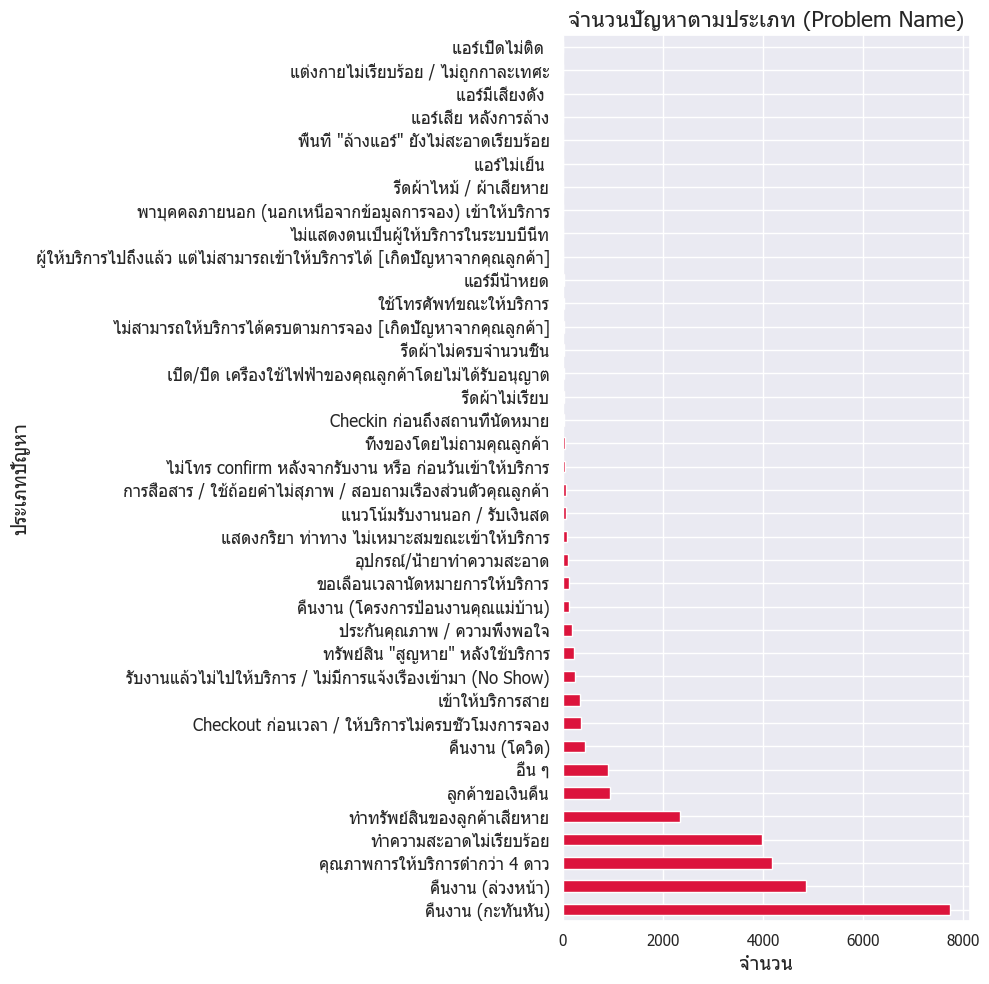

In [79]:
plt.figure(figsize=(10, 10))
sns.set(font="Tahoma")  # Use a font that supports Thai, if available on your system
data["problem_name"].value_counts().plot(kind='barh', color="crimson")  # Change to horizontal bar chart
plt.title("‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏ï‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó (Problem Name)", fontsize=16)
plt.xlabel("‡∏à‡∏≥‡∏ô‡∏ß‡∏ô", fontsize=14)  # X-axis is now count
plt.ylabel("‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏õ‡∏±‡∏ç‡∏´‡∏≤", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

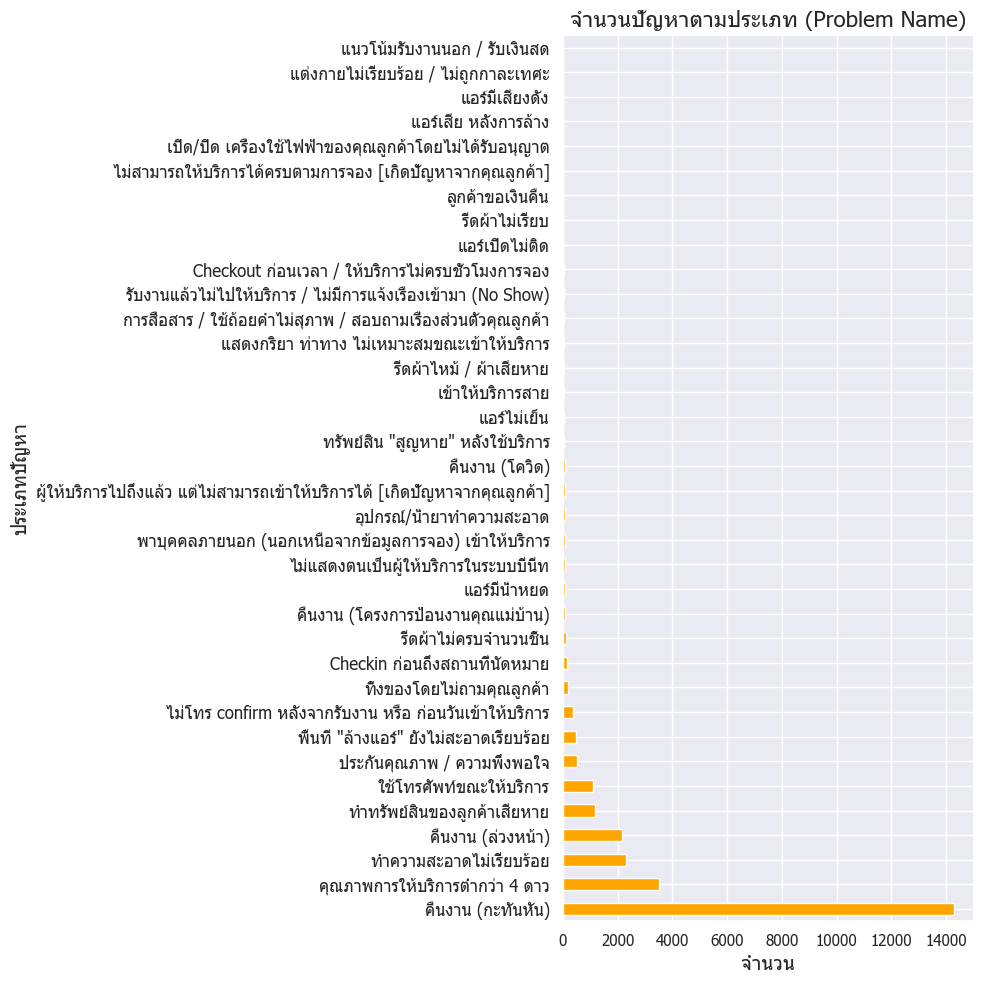

In [80]:
plt.figure(figsize=(10, 10))
sns.set(font="Tahoma")  # Use a font that supports Thai, if available on your system
data["category"].value_counts().plot(kind='barh', color="orange")  # Change to horizontal bar chart
plt.title("‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏ï‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó (Problem Name)", fontsize=16)
plt.xlabel("‡∏à‡∏≥‡∏ô‡∏ß‡∏ô", fontsize=14)  # X-axis is now count
plt.ylabel("‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏õ‡∏±‡∏ç‡∏´‡∏≤", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()